In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ..., 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0,

In [4]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [6]:
x_Train.shape, y_Train.shape, x_Test.shape, y_Test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

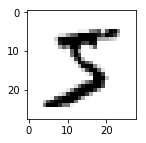

In [8]:
plot_image(x_Train[0])

In [9]:
y_Train[0]

5

In [16]:
def plot_with_labels(images, labels, prediction, idx, num =10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label = " + str(labels[idx])
        
        if len(prediction) > 0:
            title += ",predict = " + str(prediction[idx])
            
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        
        idx += 1
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


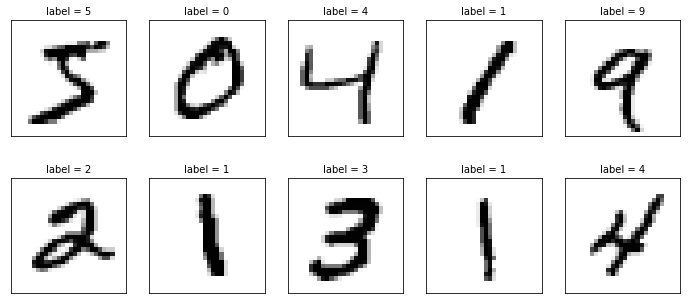

In [17]:
plot_with_labels(x_Train,y_Train,[],0,10)

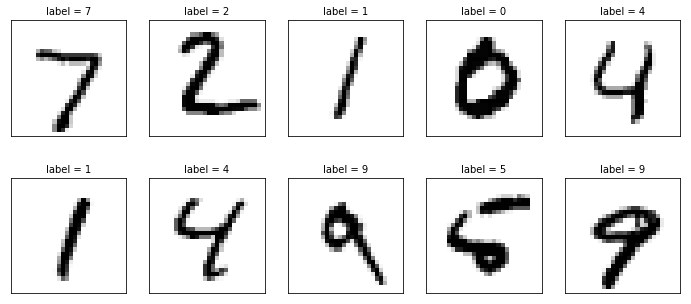

In [18]:
plot_with_labels(x_Test,y_Test,[],0,10)

In [19]:
# 多加一個顏色的維度 
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [20]:
x_Train4D.shape

(60000, 28, 28, 1)

In [21]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [22]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

## Build CNN model

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [24]:
model = Sequential()

## STEP1 set up filter

In [25]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters = 16,
                 kernel_size = (5,5),
                 padding = 'same',
                 input_shape = (28,28,1), 
                 activation = 'relu'))

## STEP2 Set up Maxpool

In [26]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [30]:
# 平坦化
model.add(Flatten())

In [31]:

model.add(Dense(128, activation='relu'))

In [32]:
model.add(Dropout(0.5))

In [33]:
model.add(Dense(10,activation='softmax'))

In [34]:
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# Train CNN Model

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [36]:
train_history = model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 79s - loss: 0.5232 - acc: 0.8356 - val_loss: 0.0945 - val_acc: 0.9721
Epoch 2/20
 - 78s - loss: 0.1374 - acc: 0.9590 - val_loss: 0.0631 - val_acc: 0.9807
Epoch 3/20
 - 76s - loss: 0.0967 - acc: 0.9715 - val_loss: 0.0528 - val_acc: 0.9854
Epoch 4/20
 - 77s - loss: 0.0794 - acc: 0.9765 - val_loss: 0.0431 - val_acc: 0.9872
Epoch 5/20
 - 84s - loss: 0.0667 - acc: 0.9804 - val_loss: 0.0431 - val_acc: 0.9871
Epoch 6/20
 - 78s - loss: 0.0592 - acc: 0.9817 - val_loss: 0.0368 - val_acc: 0.9896
Epoch 7/20
 - 78s - loss: 0.0525 - acc: 0.9841 - val_loss: 0.0361 - val_acc: 0.9893
Epoch 8/20
 - 80s - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0326 - val_acc: 0.9907
Epoch 9/20
 - 73s - loss: 0.0432 - acc: 0.9872 - val_loss: 0.0351 - val_acc: 0.9899
Epoch 10/20
 - 66s - loss: 0.0404 - acc: 0.9878 - val_loss: 0.0325 - val_acc: 0.9916
Epoch 11/20
 - 66s - loss: 0.0367 - acc: 0.9886 - val_loss: 0.0295 - val_acc: 0.9914
Epoch 12/20
 - 65s - los

In [37]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

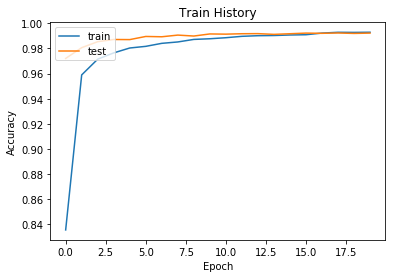

In [38]:
show_train_history('acc','val_acc')

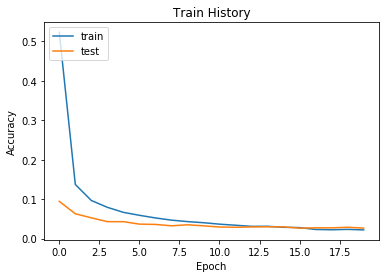

In [39]:
show_train_history('loss','val_loss')

In [40]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 6s 611us/step


0.99309999999999998

## Predict

In [41]:
prediction = model.predict_classes(x_Test4D_normalize)

In [42]:

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

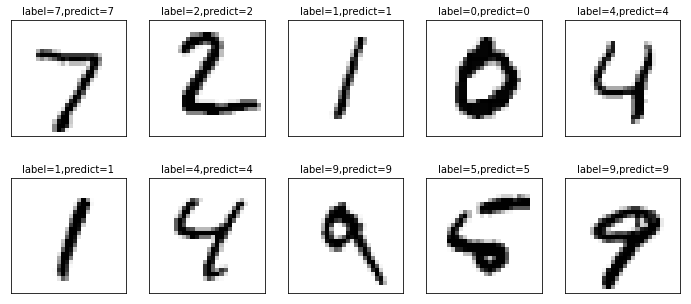

In [43]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

## Confusion matrix

In [44]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1133,1,0,0,0,0,0,1,0
2,1,0,1027,0,0,0,0,2,2,0
3,0,0,0,1007,0,2,0,0,1,0
4,0,0,0,0,977,0,0,0,2,3
5,2,0,0,7,0,881,1,0,0,1
6,3,2,0,0,1,3,948,0,1,0
7,0,3,0,0,0,0,0,1024,1,0
8,2,0,1,2,0,1,0,1,965,2


In [45]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [46]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1393,5,3
2035,5,3
2597,5,3
4360,5,3
5937,5,3
